## Objective: 
The objective of this notebook is to perform Exploratory Data Analysis on the TED data with partial dependence plots. 


## Flow of the notebook:
Where ever there is an interesting pattern I would plot partial dependence plots to check the validity. That is to see if the pattern is really valid. 

Explanation on Partial Dependence Plots will be given we encounter them. 

Let's dig in!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

np.set_printoptions(suppress=True)

sns.set_palette("muted")
sns.set_style("whitegrid")



I dislike when I cannot look at all the columns in the dataframe. Hence changing the settings...

In [2]:
from IPython.display import display

def display_dataframe(df):
    with pd.option_context("display.max_columns", 1000):
        with pd.option_context("display.max_rows",5):
            display(df)

In [3]:
dataset = pd.read_csv("ted_main.csv")
display_dataframe(dataset)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721


In [4]:
dataset.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


### Who gave more number of talks?

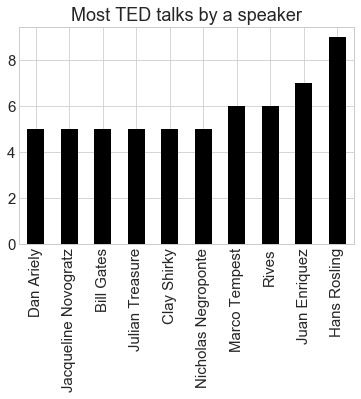

In [5]:
dataset['main_speaker'].value_counts().sort_values().tail(10).plot(kind = "bar", title = "Most TED talks by a speaker",
                                                                   color = "black");

In [6]:
dataset['event'].unique()

array(['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006',
       'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007',
       'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008',
       'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007',
       'TED Prize Wish', 'TEDSalon 2009 Compassion',
       'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008',
       'TED2001', 'TED in the Field', 'TED2009', 'EG 2008',
       'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State',
       'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009',
       'Justice with Michael Sandel', 'Business Innovation Factory',
       'TEDxTC', 'Carnegie Mellon University', 'Stanford University',
       'AORN Congress', 'University of California', 'TEDMED 2009',
       'Royal Institution', 'Bowery Poetry Club', 'TEDxSMU',
       'Harvard University', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010',
       'TEDxAmsterdam', 'World Science Festival', 'BBC TV

<p>Looking at the feature events, we can see that there are two types of events overall. </p>

<ol>
<li>TEDx events that are less in number. </li>
<li>Main TED events that are more in number. </li>
</ol>

Creating a new feature which distinguishes this. 

### How many TED/Non-TED events are there?

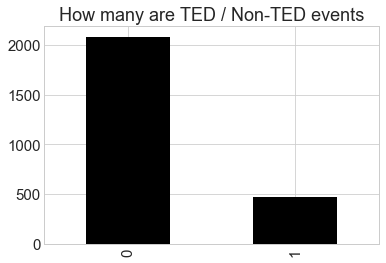

In [7]:
# creating a new feature, is_subevent. If the event is TED then is_subevent is 0, else 1. 
dataset['is_subevent'] = dataset['event'].apply(lambda x: 1 if "TEDx" in x else 0)
dataset['is_subevent'].value_counts().plot(kind = "bar", color = "black", title = "How many are TED / Non-TED events");

### Where were the most Non-TED events hosted at?

C:\Users\saikiranputta\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


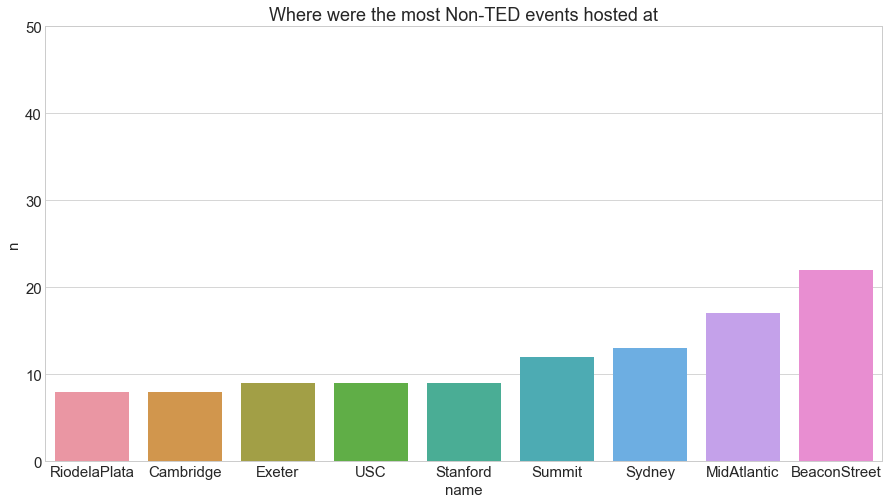

In [8]:
dataset['sub_event'] = dataset['event'].apply(lambda x: x[4:] if "TEDx" in x else "Nan")

inspect_df = dataset['sub_event'].value_counts().sort_values().tail(10).to_frame().reset_index()
inspect_df.columns = ['name', 'n']
inspect_df = inspect_df.drop(inspect_df.index[9])

fig = plt.figure(figsize = (15,8))
sns.barplot(x = "name", y = "n", data = inspect_df).set_title("Where were the most Non-TED events hosted at")
plt.ylim(0,50);

### Creating more features from timestamps

From both the timestamps -- filmdate and published_date. Extracting new features Year, Month, Week, Day and DayofWeek

In [9]:
# create dates from timestamps. 
import datetime as dt
def create_date_fields():
    global dataset
    film_date = dataset['film_date'] = dataset['film_date'].apply(lambda x: dt.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
    film_date = pd.to_datetime(film_date)
    
    published_date = dataset['published_date'] = dataset['published_date'].apply(lambda x: dt.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
    published_date = pd.to_datetime(published_date)

    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek'):
        dataset['filmdate'+n] = getattr(film_date.dt,n.lower())
        dataset['published_date'+n] = getattr(published_date.dt, n.lower())
    temp = pd.DataFrame({'film_date': film_date, 
                         'published_date': published_date})
    dataset['time_difference'] = temp.apply(lambda x: (x['published_date'] - x['film_date']).days , axis = 1)
create_date_fields()
display_dataframe(dataset)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,is_subevent,sub_event,filmdateYear,published_dateYear,filmdateMonth,published_dateMonth,filmdateWeek,published_dateWeek,filmdateDay,published_dateDay,filmdateDayofweek,published_dateDayofweek,time_difference
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0,Nan,2006,2006,2,6,8,26,24,26,4,0,122
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0,Nan,2006,2006,2,6,8,26,24,26,4,0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,07-07-2017,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,21-09-2017,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,1,MileHigh,2017,2017,7,9,27,38,7,21,4,3,76
2549,8,With more than half of the world population li...,519,TED2017,23-04-2017,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,22-09-2017,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,0,Nan,2017,2017,4,9,16,38,23,22,6,4,152


### How did number of talks, views vary by year released?

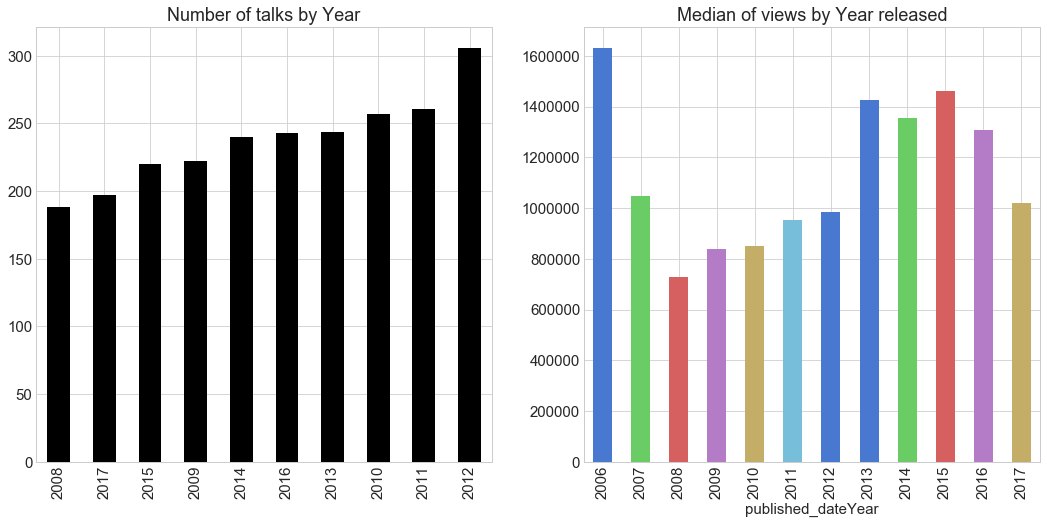

In [10]:
#views and counts by year, month, date, day etc. 
fig = plt.figure(figsize = (18,8))
fig.add_subplot(121)
dataset['published_dateYear'].value_counts().sort_values().tail(10).plot(kind = "bar", title = "Number of talks by Year", 
                                                                   color = "black")

fig.add_subplot(122)
dataset.groupby(['published_dateYear'])['views'].median().plot(kind = "bar", title = "Median of views by Year released");


Here we can see an interesting relationship in both the plots. Let's plot a partial dependence plot to understand the relationship better. 

Before that, let's look at the relationship more closely.

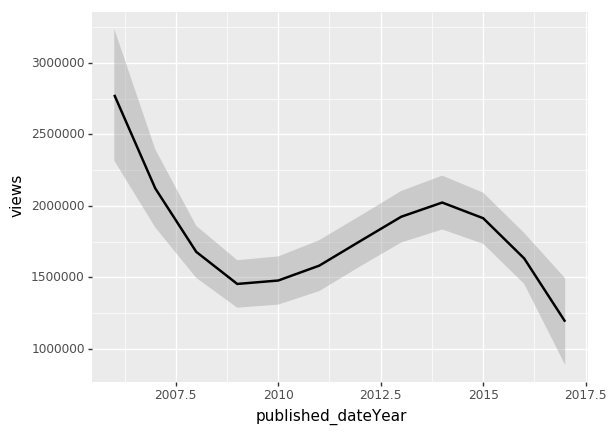

<ggplot: (160959603099)>

In [11]:
from pdpbox import pdp
from plotnine import *

ggplot(dataset, aes('published_dateYear', 'views'))+stat_smooth(se=True, method='loess')



Is there an actual relationship like above? 

<b> Or is it an effect of some other feature that we are observing creeping into the Year feature? </b>
<p>we can use partial dependence plots to investigate this. </p>

### What are partial dependence plots?

It is quite common in data analysis that you see distinct pattern in a pair of features. 
But how can you be sure that what ever pattern you see is because of the independent variable you are checking, or it is because
of some other variable's effect on your current plot?

Partial Dependence Plots help here. 

<b> How do Partial Dependence Plots work?</b>

<p>Let's assume you have the following dataset. (Feature1 is numeric and Feature2 is categorical) </p>
<table>
  <tr>
    <th>Feature1</th>
    <th>Feature2</th>
  </tr>
  <tr>
    <td>20</td>
    <td>Cat1</td>
  </tr>
  <tr>
    <td>21</td>
    <td>Cat2</td>
  </tr>
  <tr>
    <td>22</td>
    <td>Cat3</td>
  </tr>
  <tr>
    <td>23</td>
    <td>Cat4</td>
  </tr>
</table>
Let's say Feature1 is the target and Feature2 is the independent feature. 
To get a partial dependence plot, <i>you fit a model with all the unique observations of independent feature you are interested
in one at a time. Collect the results <b> for all the individual observations </b> and plot them! </i>

This is what you would do to get a partial dependence plot for this data. 
<ol>
<li> Fit a model with Feature2 column as <b>Cat1</b> and collect the results for each observation</li>
<li> Fit a model with Feature2 column as <b>Cat2</b> and collect the results for each observation</li>
<li> Fit a model with Feature2 column as <b>Cat3</b> and collect the results for each observation</li>
<li> Fit a model with Feature2 column as <b>Cat4</b> and collect the results for each observation</li>

<li> Calculate the mean grouping by Feature2
<ol>

### Partial Dependence Plot for published_dateYear

Using RandomForest Regressor here. 

<p> <b> Also note that we are not tuning the hyper parameters since we are only interested in feature interaction. </b> </p>

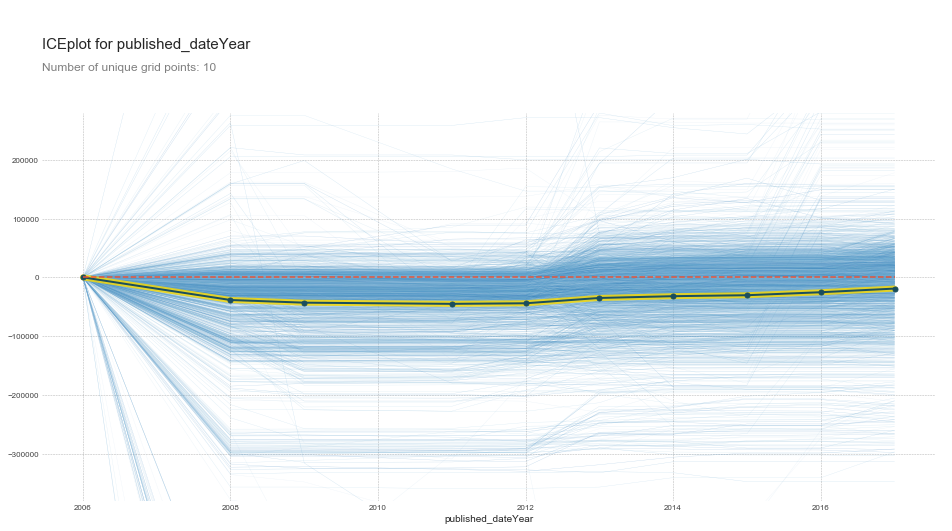

In [12]:
from pandas.api.types import is_string_dtype
from sklearn.ensemble import RandomForestRegressor

selected_features = ['comments', 'duration', 'event', 'languages','main_speaker','num_speaker','ratings','speaker_occupation',
                    'views','is_subevent','filmdateYear', 'published_dateYear', 'filmdateMonth', 
                     'published_dateMonth','filmdateWeek', 'published_dateWeek', 'filmdateDay',
       'published_dateDay', 'filmdateDayofweek', 'published_dateDayofweek', 'time_difference']
model_data_x = dataset[selected_features]
model_data_y = dataset['views']
for n,c in model_data_x.items():
    if is_string_dtype(c):
        model_data_x[n] = c.astype('category').cat.as_ordered()
        model_data_x[n] = model_data_x[n].cat.codes + 1

# Not doing an hyper parameter tuning. We are only interested in feature interaction. 
m = RandomForestRegressor(n_estimators = 50, max_features=0.6, n_jobs=-1, random_state = 123)
m.fit(model_data_x, model_data_y);

# The method is pulled from Jeremy Howard's ML course. 
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, model_data_x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, n_cluster_centers=clusters)
plot_pdp('published_dateYear')

The negativity on the Y-axis represents the deviation from the first year. It doesn't mean we had negative views! 

### Repeating the same process for the feature, month. 

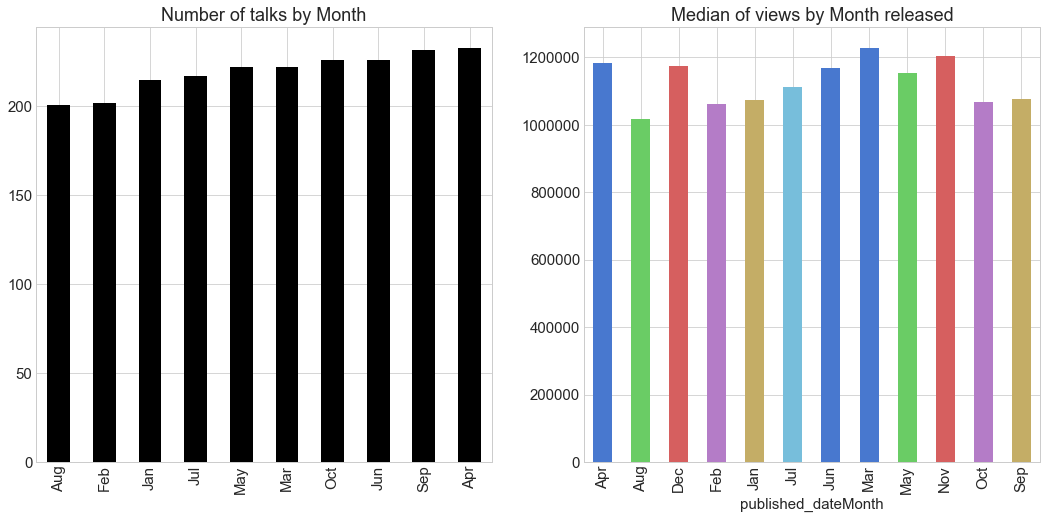

In [13]:
#views and counts by year, month, date, day etc.
Month_index = {1:'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dataset['published_dateMonth'] = dataset['published_dateMonth'].apply(lambda x: Month_index[x])

fig = plt.figure(figsize = (18,8))
fig.add_subplot(121)
dataset['published_dateMonth'].value_counts().sort_values().tail(10).plot(kind = "bar", title = "Number of talks by Month", 
                                                                   color = "black")

fig.add_subplot(122)
dataset.groupby(['published_dateMonth'])['views'].median().plot(kind = "bar", title = "Median of views by Month released");


### Published Month vs Views

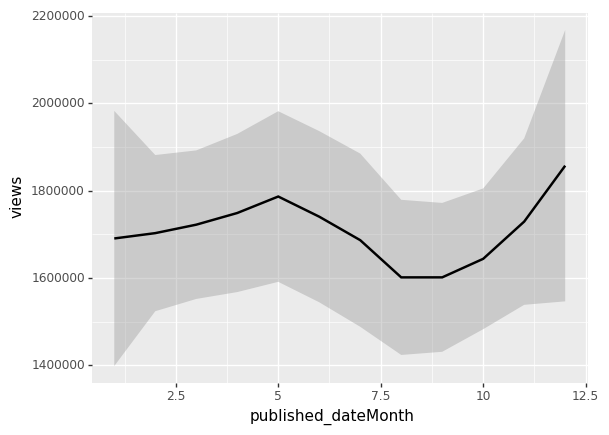

<ggplot: (160960766742)>

In [14]:
Month_index_reverse = {y:x for x,y in Month_index.items()}
dataset_temp = dataset
dataset_temp['published_dateMonth'] = dataset['published_dateMonth'].apply(lambda x: Month_index_reverse[x])
ggplot(dataset_temp, aes('published_dateMonth', 'views'))+stat_smooth(se=True, method='loess')



In [15]:
del dataset_temp, Month_index_reverse

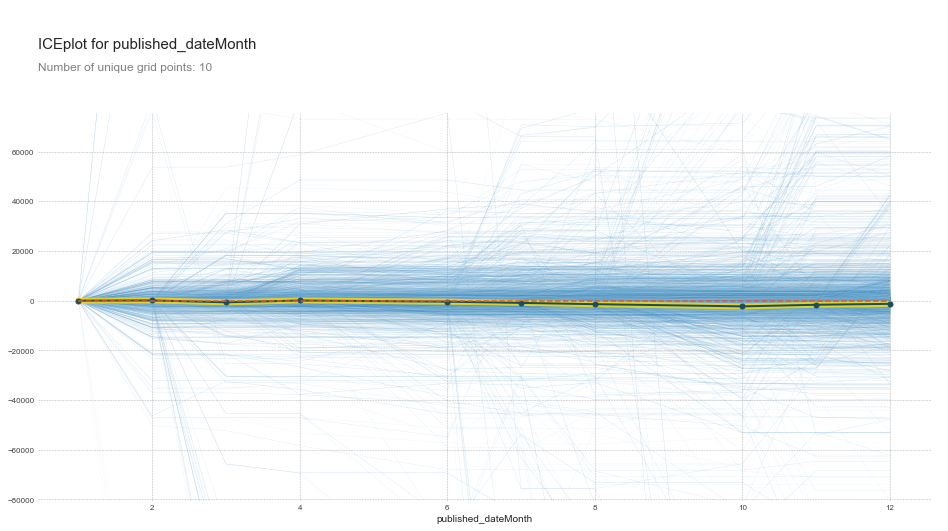

In [16]:
plot_pdp('published_dateMonth')

This is something very interesting. While the normal graphs say that there definetly is some pattern -- Increase in number of views in May and December. 
It is evident that it is because of some other features during those months that we are seeing that pattern. 

It is not just because of those months!

### How did number of talks and views vary by Week-of-year?

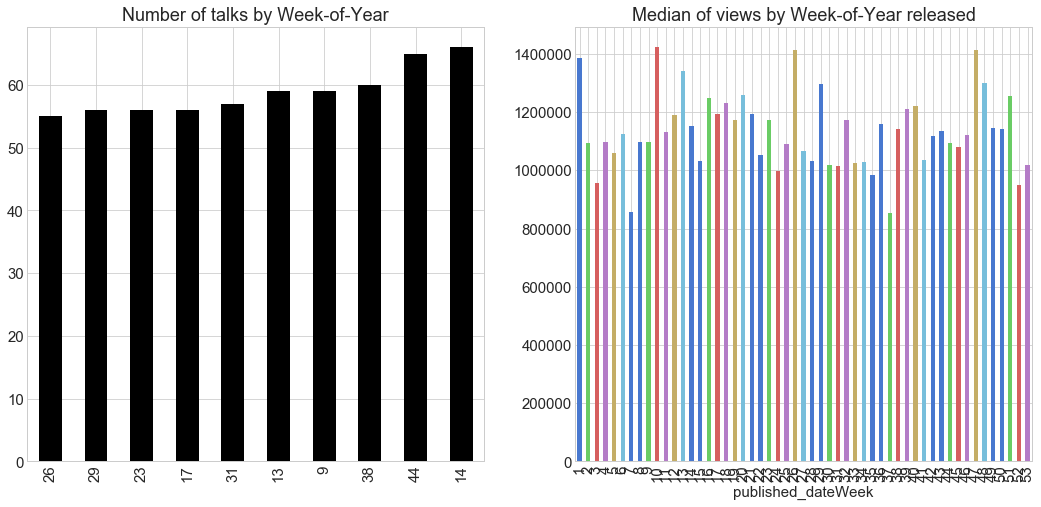

In [17]:

#views and counts by year, month, date, day etc. 
fig = plt.figure(figsize = (18,8))
fig.add_subplot(121)
dataset['published_dateWeek'].value_counts().sort_values().tail(10).plot(kind = "bar", title = "Number of talks by Week-of-Year", 
                                                                   color = "black")

fig.add_subplot(122)
dataset.groupby(['published_dateWeek'])['views'].median().plot(kind = "bar", title = "Median of views by Week-of-Year released");


### How did the number of talks, views vary by Day released?

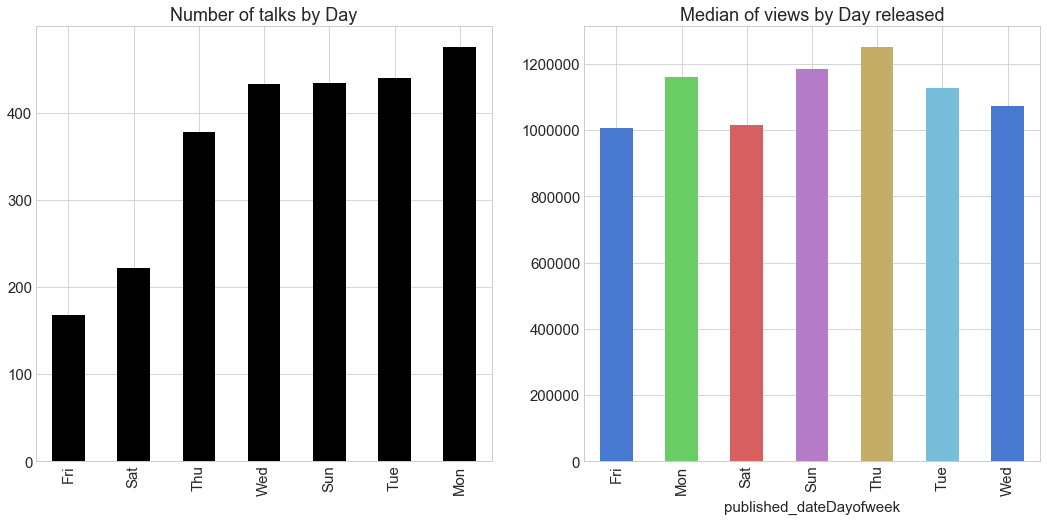

In [18]:
#views and counts by year, month, date, day etc.
Day_index = {0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}
dataset['published_dateDayofweek'] = dataset['published_dateDayofweek'].apply(lambda x: Day_index[x])

fig = plt.figure(figsize = (18,8))
fig.add_subplot(121)
dataset['published_dateDayofweek'].value_counts().sort_values().tail(10).plot(kind = "bar", title = "Number of talks by Day", 
                                                                   color = "black")

fig.add_subplot(122)
dataset.groupby(['published_dateDayofweek'])['views'].median().plot(kind = "bar", title = "Median of views by Day released");


### Published_dateDayofWeek vs Views

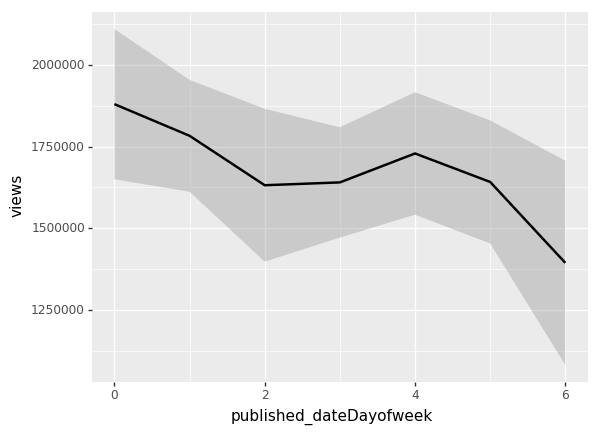

<ggplot: (160963345072)>

In [19]:
day_index_reverse = {y:x for x,y in Day_index.items()}
dataset_temp = dataset
dataset_temp['published_dateDayofweek'] = dataset['published_dateDayofweek'].apply(lambda x: day_index_reverse[x])
ggplot(dataset_temp, aes('published_dateDayofweek', 'views'))+stat_smooth(se=True, method='loess')


In [20]:
del dataset_temp, day_index_reverse

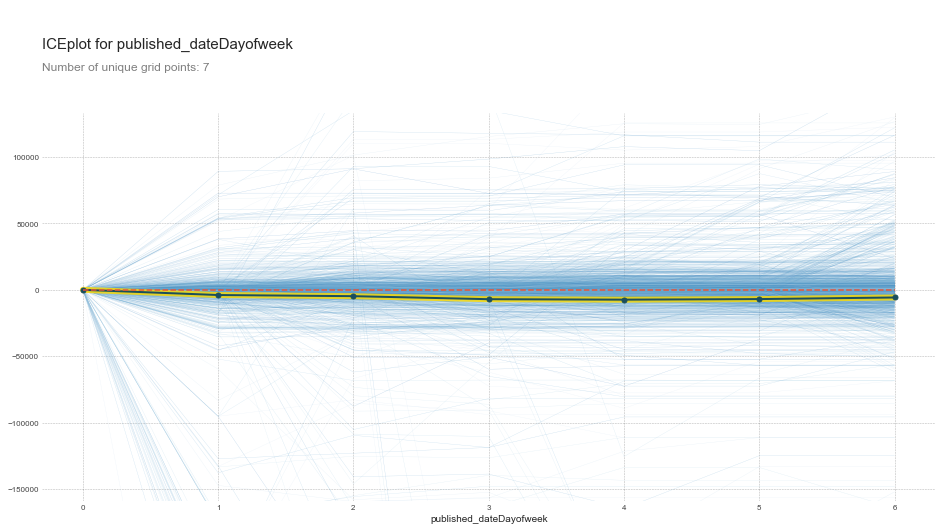

In [21]:
plot_pdp('published_dateDayofweek')

<b> We can see something very similar here too. The number of views a talk garners is not a function of Date (Year / Month etc). 
But there is something else that is enabling talks to garner more views! <b>

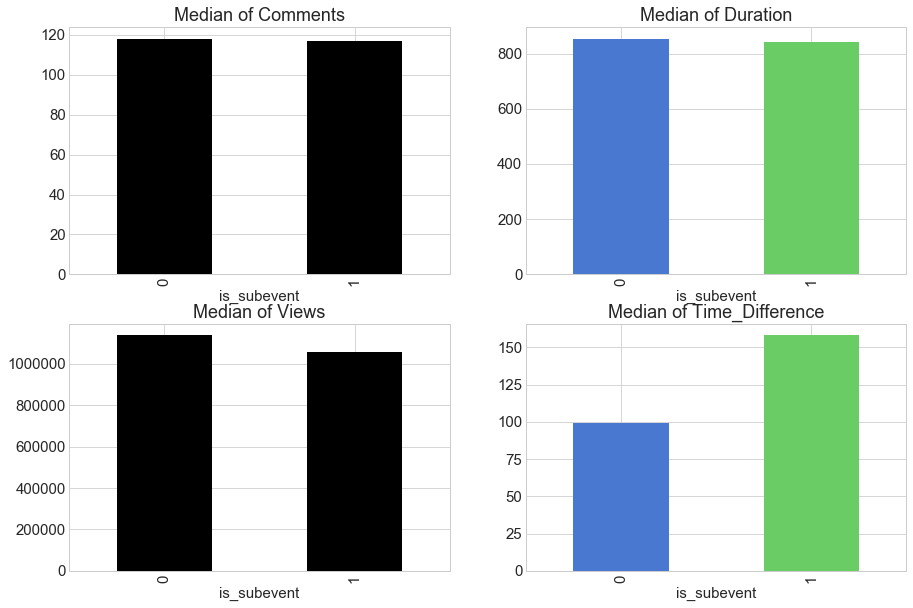

In [22]:

fig = plt.figure(figsize = (15,10))
fig.add_subplot(221)
dataset.groupby(['is_subevent'])['comments'].median().plot(kind = "bar", title = "Median of Comments", color = "black")

fig.add_subplot(222)
dataset.groupby(['is_subevent'])['duration'].median().plot(kind = "bar", title = "Median of Duration")

fig.add_subplot(223)
dataset.groupby(['is_subevent'])['views'].median().plot(kind = "bar", title = "Median of Views", color = "black")

fig.add_subplot(224)
dataset.groupby(['is_subevent'])['time_difference'].median().plot(kind = "bar", title = "Median of Time_Difference");

There doesn't seem to be much variation in all the graphs except the last one. 
It is indicative that it almost takes a couple of months more to upload the video if it was a TEDx event!

And also you can expect TED talks to have slightly more views than a TEDx talk.

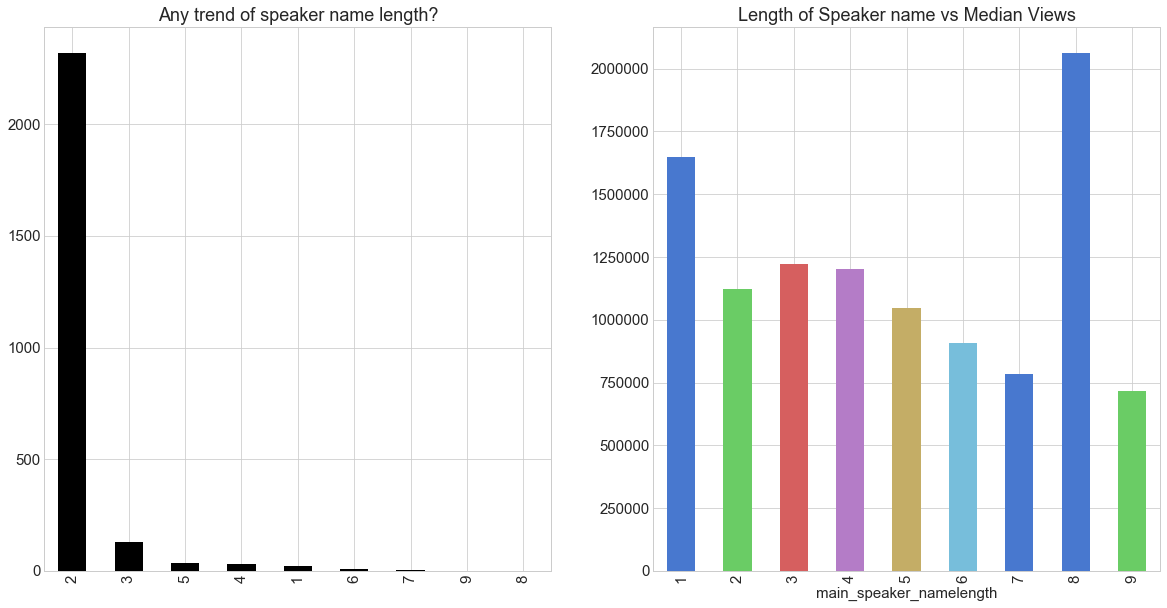

In [23]:
# How big is the speaker name? Any interesting trends there?
fig = plt.figure(figsize = (20,10))
fig.add_subplot(121)
dataset['main_speaker_namelength'] = dataset['main_speaker'].apply(lambda x: len(x.split(" ")))
dataset['main_speaker_namelength'].value_counts().plot(kind = "bar", title = "Any trend of speaker name length?", 
                                                      color = "black")

fig.add_subplot(122)
dataset.groupby(['main_speaker_namelength'])['views'].median().plot(kind = "bar",title = "Length of Speaker name vs Median Views");


No suprises here!
Most of the speakers have a first, last name. Some have middle name too.

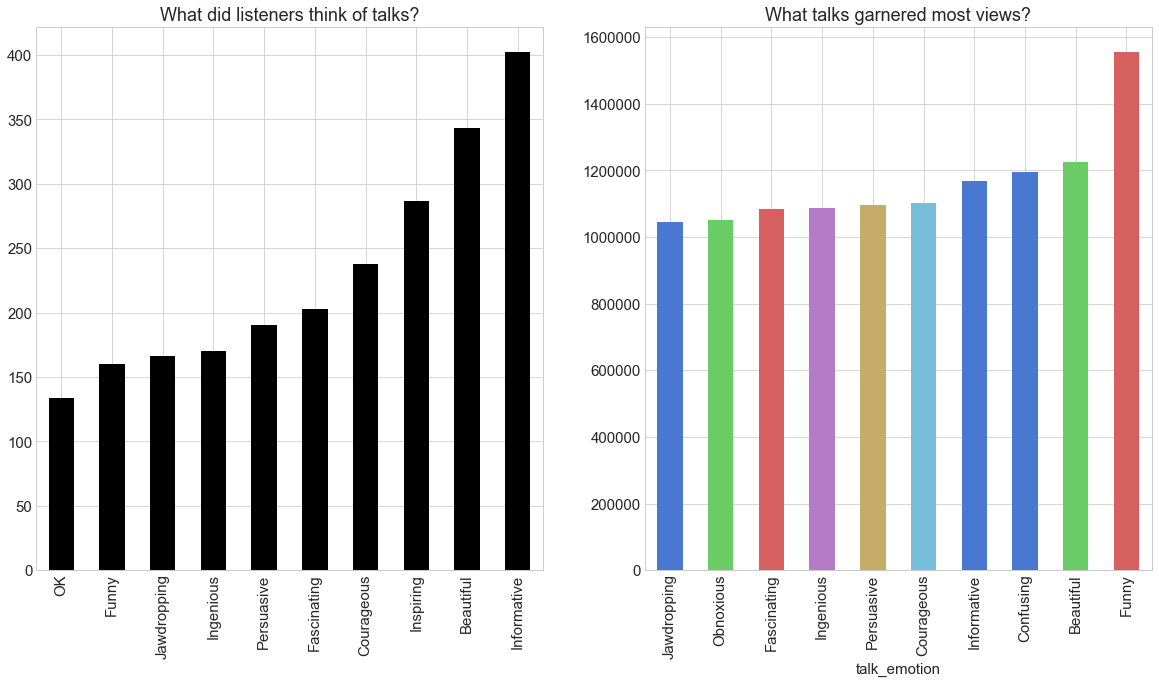

In [24]:
from string import punctuation

def extract_talkemotion(string):
    start_index = string.find(":", 10)
    end_index = string.find(",", start_index + 1)
    def strip_punctuation(s):
        return "".join(c for c in s if c not in punctuation)
    return strip_punctuation(string[start_index + 1 : end_index].strip())

dataset['talk_emotion'] = dataset['ratings'].apply(extract_talkemotion)

fig = plt.figure(figsize = (20,10))
fig.add_subplot(121)
dataset['talk_emotion'].value_counts().sort_values().tail(10).plot(kind = "bar", color = "black",
                                                                   title = "What did listeners think of talks?")

fig.add_subplot(122)
dataset.groupby(['talk_emotion'])['views'].median().sort_values().tail(10).plot(kind = "bar",title = "What talks garnered most views?");

#Most of the people felt, positive emotions -- Funny, Informative, Ingenious, Inspiring, Jawdropping mostly. 
# Probably the reason why TED talks are so popular. 

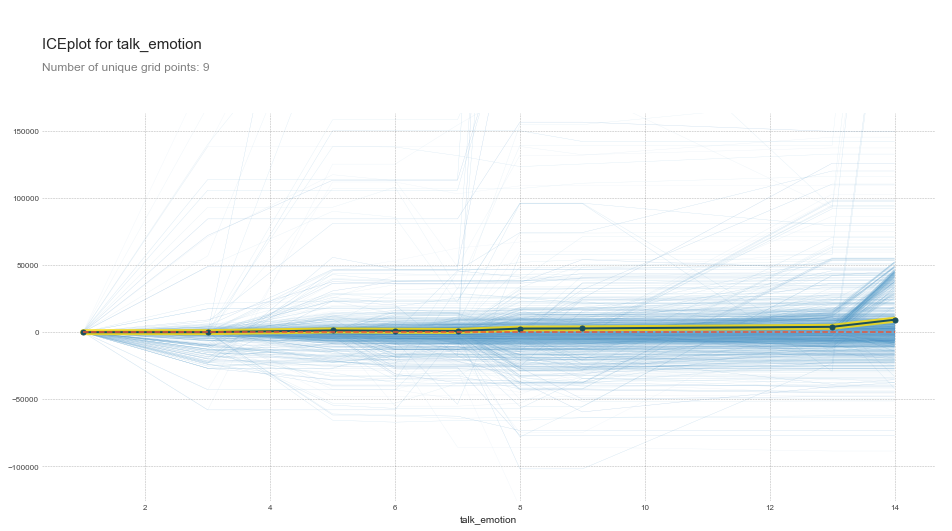

In [25]:
model_data_x['talk_emotion'] = dataset['ratings'].apply(extract_talkemotion)
emotion_type = model_data_x['talk_emotion'] = model_data_x['talk_emotion'].astype('category').cat.as_ordered()
emotion_code = model_data_x['talk_emotion'] = model_data_x['talk_emotion'].cat.codes + 1
    
m = RandomForestRegressor(n_estimators=40, max_features=0.6, n_jobs=-1, random_state = 1234)
m.fit(model_data_x, model_data_y);

plot_pdp('talk_emotion')

In [26]:
# This is the type of emotion that is getting most views. 
emotion_type.cat.categories[-1:]

Index(['Unconvincing'], dtype='object')

<b> This is particularly interesting! We would have missed it completely if we were dependent on normal graphs. 
We now know.... give an Unconvincing talk if you want more views! </b> :stuck_out_tongue:

### What is the talk primarily about?

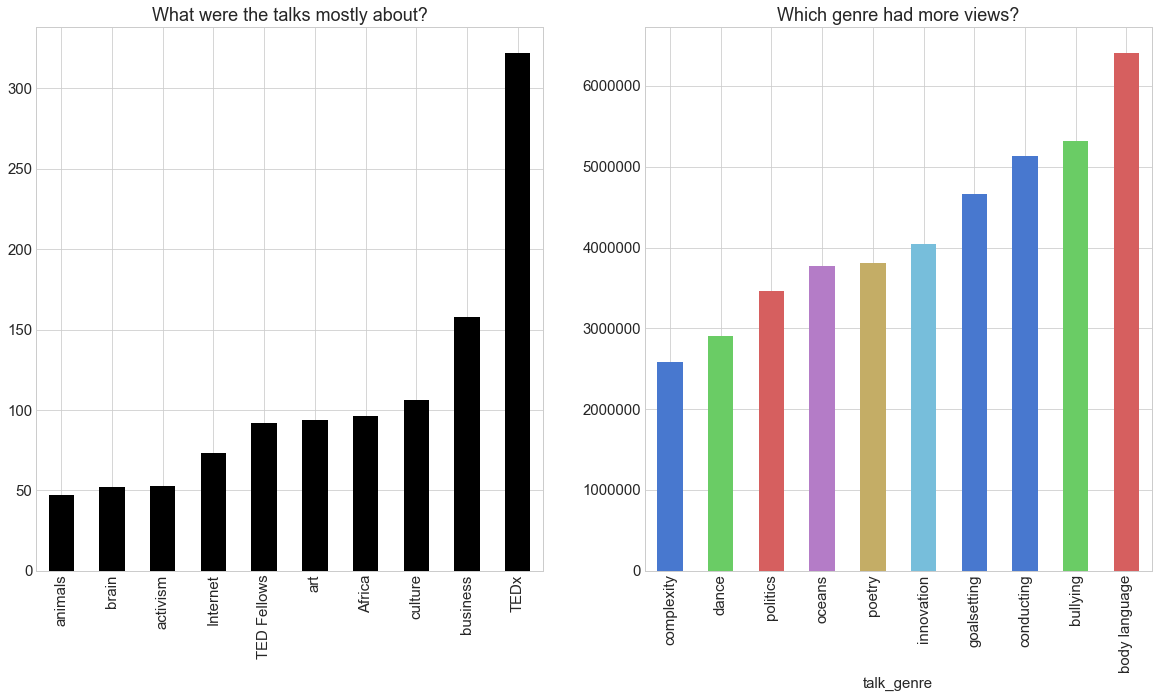

In [27]:
def extract_talkgenre(string):
    start_index = string.find("'")
    end_index = string.find("'", start_index + 1)
    def strip_punctuation(s):
        return "".join(c for c in s if c not in punctuation)
    return strip_punctuation(string[start_index + 1 : end_index].strip())
dataset['talk_genre'] = dataset['tags'].apply(extract_talkgenre)

fig = plt.figure(figsize = (20,10))
fig.add_subplot(121)
dataset['talk_genre'].value_counts().sort_values().tail(10).plot(kind = "bar", color = "black",
                                                                 title = "What were the talks mostly about?")

fig.add_subplot(122)
dataset.groupby(['talk_genre'])['views'].median().sort_values().tail(10).plot(kind = "bar", 
                                                                              title = "Which genre had more views?");
    

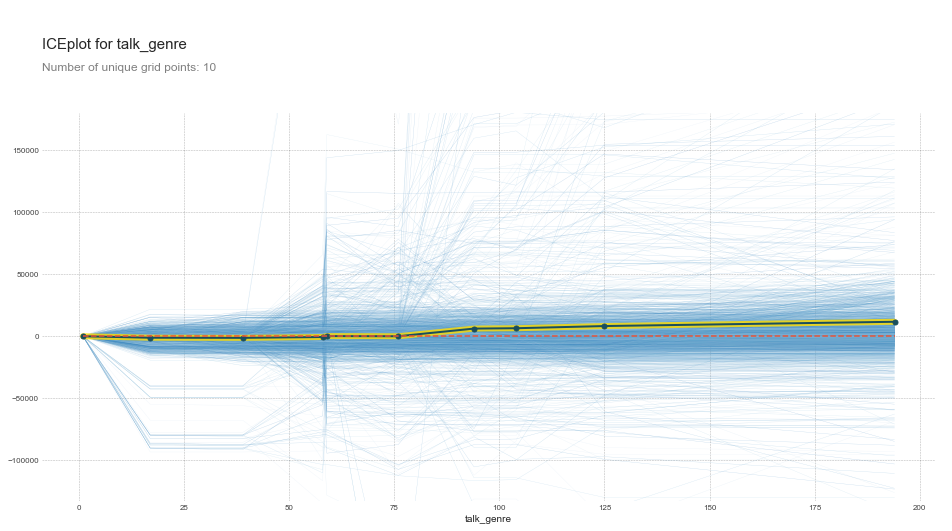

In [28]:
model_data_x['talk_genre'] = dataset['tags'].apply(extract_talkgenre)
genre_names = model_data_x['talk_genre'] = model_data_x['talk_genre'].astype('category').cat.as_ordered()
genre_codes = model_data_x['talk_genre'] = model_data_x['talk_genre'].cat.codes + 1
    
m = RandomForestRegressor(n_estimators=40, max_features=0.6, n_jobs=-1, random_state = 12345)
m.fit(model_data_x, model_data_y);

plot_pdp('talk_genre')

Let's look at the top 3 genre types that can garner more views. 

In [29]:
genre_names.cat.categories[-3]

'security'

We can conclude the following that, features related to date has no impact on the number of views ,<b> directly </b>.
While it is interesting to see that the topic on which the talk is on has relatively higher importance. 


So listen up aspiring TED speakers...
Give a <b>Unconvincing</b> talk about <b>(security / sports / technology)</b> to garner more views!

Give a thumbs up if you liked the notebook. 
Let me know if you have some suggestions! :)